In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Correlation between Weather Variables and Energy Consumption
Energy has high positive correlation with humidity and high negative correlation with temperature.
Dew Point, UV Index display multicollinearity with Temperature, hence discarded
Cloud Cover and Visibility display multicollinearity with Humidity, hence discarded
Pressure and Moon Phase have minimal correlation with Energy, hence discarded
Wind Speed has low correlation with energy but does not show multicollinearity

In [2]:
weather_energy_holiday=pd.read_csv("D:/Project/smart-meters-in-london/outputfiles/weather_energy_holiday.csv")

In [3]:
cor_matrix = weather_energy_holiday[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']].corr()
cor_matrix

avg_energy  temperatureMax  dewPoint  cloudCover  windSpeed  \
avg_energy        1.000000       -0.846965 -0.755901    0.241779   0.149624   
temperatureMax   -0.846965        1.000000  0.865038   -0.333409  -0.153602   
dewPoint         -0.755901        0.865038  1.000000   -0.025207  -0.092212   
cloudCover        0.241779       -0.333409 -0.025207    1.000000   0.170235   
windSpeed         0.149624       -0.153602 -0.092212    0.170235   1.000000   
pressure         -0.028851        0.118933 -0.028121   -0.101079  -0.344354   
visibility       -0.246404        0.259108  0.042633   -0.330177   0.281088   
humidity          0.361237       -0.404899  0.055514    0.480056  -0.042391   
uvIndex          -0.733171        0.696497  0.486692   -0.248695  -0.152634   
moonPhase        -0.031716        0.003636 -0.008239   -0.062126  -0.023273   

                pressure  visibility  humidity   uvIndex  moonPhase  
avg_energy     -0.028851   -0.246404  0.361237 -0.733171  -0.031716  
temperatureMax  0.118933    0.259108 -0.404899  0.696497   0.003636  
dewPoint       -0.028121    0.042633  0.055514  0.486692  -0.008239  
cloudCover     -0.101079   -0.330177  0.480056 -0.248695  -0.062126  
windSpeed      -0.344354    0.281088 -0.042391 -0.152634  -0.023273  
pressure        1.000000   -0.012508 -0.250941  0.100774   0.038462  
visibility     -0.012508    1.000000 -0.578130  0.240485   0.062813  
humidity       -0.250941   -0.578130  1.000000 -0.533919  -0.013997  
uvIndex         0.100774    0.240485 -0.533919  1.000000   0.012833  
moonPhase       0.038462    0.062813 -0.013997  0.012833   1.000000

# Creating Weather Clusters
The weather information has a lot of variables- which might not all be useful. We will attempt to create weather clusters to see if we can define a weather of the day based on the granular weather data like temperature, precipitation etc.

In [4]:
#scaling
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(weather_energy_holiday[['temperatureMax','humidity','windSpeed']])

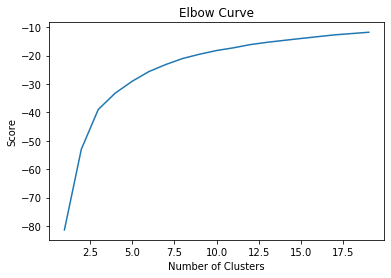

In [5]:
# optimum K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
weather_energy_cluster=weather_energy_holiday.copy()
weather_energy_cluster['weather_cluster'] = kmeans.labels_

In [8]:
weather_energy_cluster.head(5)

day  energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23   90.385000     13    6.952692           10.36          229   
1  2011-11-24  213.412000     25    8.536480           12.93          204   
2  2011-11-25  303.993000     32    9.499781           13.03          243   
3  2011-11-26  420.976000     41   10.267707           12.96          237   
4  2011-11-27  444.883001     41   10.850805           13.54          256   

   dewPoint  cloudCover  windSpeed  pressure  ...  uvIndex  temperatureLow  \
0      6.29        0.36       2.04   1027.12  ...      1.0            8.24   
1      8.56        0.41       4.04   1027.22  ...      1.0            9.71   
2      7.24        0.48       5.02   1024.47  ...      1.0            7.01   
3      6.96        0.44       5.75   1025.80  ...      1.0           11.59   
4      5.76        0.42       5.48   1021.11  ...      1.0            1.31   

   temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  \
0            3.81            10.36                    2.18       0.94   
1            8.56            12.93                    7.01       0.97   
2            7.46            12.27                    4.84       0.01   
3            7.01            12.96                    4.69       0.05   
4            4.47            13.54                    2.94       0.08   

   Bank holidays  Type  holiday_ind  weather_cluster  
0            NaN   NaN            0                0  
1            NaN   NaN            0                0  
2            NaN   NaN            0                2  
3            NaN   NaN            0                2  
4            NaN   NaN            0                2  

[5 rows x 25 columns]

In [9]:
weather_energy_cluster.to_csv("D:/Project/smart-meters-in-london/outputfiles/weather_energy_cluster.csv",index=False)

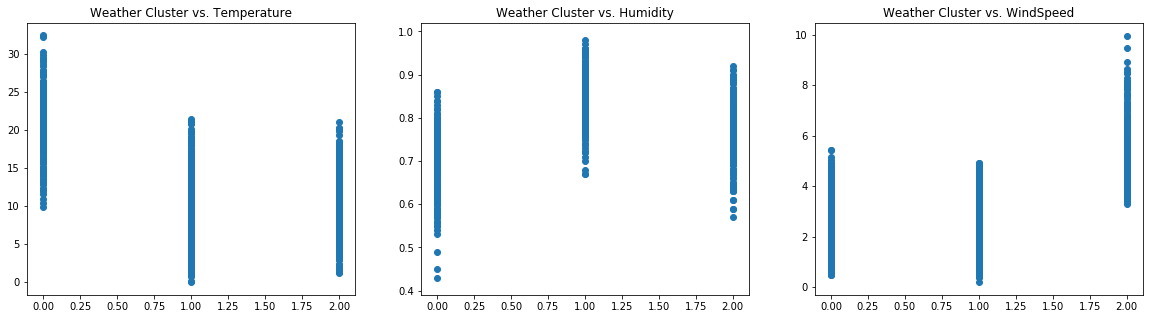

In [20]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(weather_energy_cluster.weather_cluster,weather_energy_cluster.temperatureMax)
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)
plt.scatter(weather_energy_cluster.weather_cluster,weather_energy_cluster.humidity)
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)
plt.scatter(weather_energy_cluster.weather_cluster,weather_energy_cluster.windSpeed)
plt.title('Weather Cluster vs. WindSpeed')

plt.show()
# put this in a loop

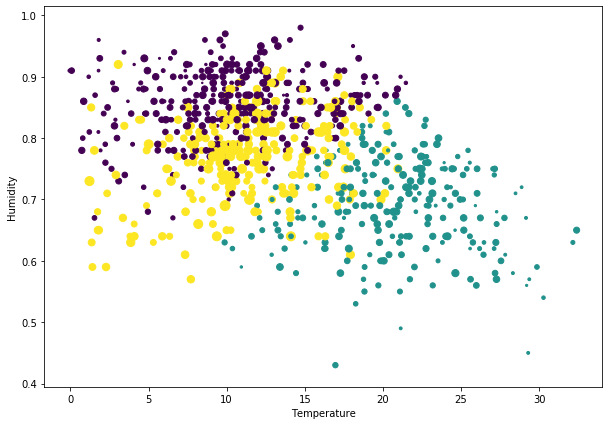

In [10]:
fig, ax1 = plt.subplots(figsize = (10,7))
ax1.scatter(weather_energy_cluster.temperatureMax, 
            weather_energy_cluster.humidity, 
            s = weather_energy_cluster.windSpeed*10,
            c = weather_energy_cluster.weather_cluster)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()